Enter the names of bank account CSV files (comma-separated): axis.csv
Enter keywords to search (comma-separated): NEFT
Enter start date (YYYY-MM-DD): 2023-01-01
Enter end date (YYYY-MM-DD): 2023-11-01


C:\Users\priya\AppData\Local\Temp\ipykernel_13552\3758243208.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Debit'] = df['Debit'].abs()  # Convert negative Debit values to positive (expenses)
C:\Users\priya\AppData\Local\Temp\ipykernel_13552\3758243208.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit'] = df['Credit'].abs()  # Convert negative Credit values to positive (earnings)


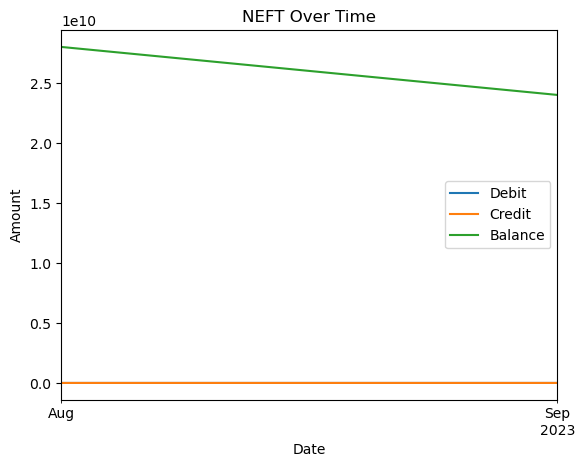

Category: NEFT
Total Expenses: 79197.11
Total Earnings: 157179.57



In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


# Load and preprocess bank account statements
# Load and preprocess bank account statements with the correct date format
def load_and_preprocess(accounts):
    data = []
    for account in accounts:
        # Specify the date format to match your CSV file
        df = pd.read_csv(account, parse_dates=['Date'], dayfirst=True)
        data.append(df)
    return pd.concat(data)


# Categorize line items based on keywords
def categorize_data(data, keywords):
    categorized_data = {}
    for keyword in keywords:
        categorized_data[keyword] = data[data['Description'].str.contains(keyword, case=False)]
    return categorized_data

# Calculate aggregated expenses and earnings for each category
def calculate_aggregates(categorized_data):
    aggregates = {}
    for category, df in categorized_data.items():
        total_expenses = df[df['Debit'] > 0]['Debit'].sum()
        total_earnings = df[df['Credit'] > 0]['Credit'].sum()
        aggregates[category] = {'Expenses': total_expenses, 'Earnings': total_earnings}
    return aggregates

# Plot time series graphs for each category
def plot_time_series(categorized_data):
    for category, df in categorized_data.items():
        df.set_index('Date', inplace=True)
        df['Debit'] = df['Debit'].abs()  # Convert negative Debit values to positive (expenses)
        df['Credit'] = df['Credit'].abs()  # Convert negative Credit values to positive (earnings)
        df.resample('M').sum().plot(kind='line', title=f'{category} Over Time')
        plt.xlabel('Date')
        plt.ylabel('Amount')
        plt.show()


# User-defined parameters (input from the user)
accounts_input = input("Enter the names of bank account CSV files (comma-separated): ")
accounts = accounts_input.split(',')
keywords_input = input("Enter keywords to search (comma-separated): ")
keywords = keywords_input.split(',')
start_date_input = input("Enter start date (YYYY-MM-DD): ")
start_date = datetime.strptime(start_date_input, "%Y-%m-%d")
end_date_input = input("Enter end date (YYYY-MM-DD): ")
end_date = datetime.strptime(end_date_input, "%Y-%m-%d")

# Load and preprocess data
data = load_and_preprocess(accounts)

# Categorize data based on keywords
categorized_data = categorize_data(data, keywords)

# Calculate aggregated expenses and earnings for each category
aggregates = calculate_aggregates(categorized_data)

# Plot time series graphs for each category
plot_time_series(categorized_data)

# Display aggregated expenses and earnings
for category, values in aggregates.items():
    print(f'Category: {category}')
    print(f'Total Expenses: {values["Expenses"]}')
    print(f'Total Earnings: {values["Earnings"]}')
    print()